# Implementación en JULIA de Cálculo Fraccionario

In [23]:
using Images, ImageView
using TestImages

Gtk-Message: 22:29:22.155: Failed to load module "canberra-gtk-module"
Gtk-Message: 22:29:22.156: Failed to load module "canberra-gtk-module"


La  siguiente  recopilción  de  datos  se  realizó  en   la   implementación   del  libro   $\textbf{Cálculo  Fraccionario  y  k-Funciones  Especiales} $ de los autores Rubén Cerutti, Gustavo Dorrego, Luciano Luque

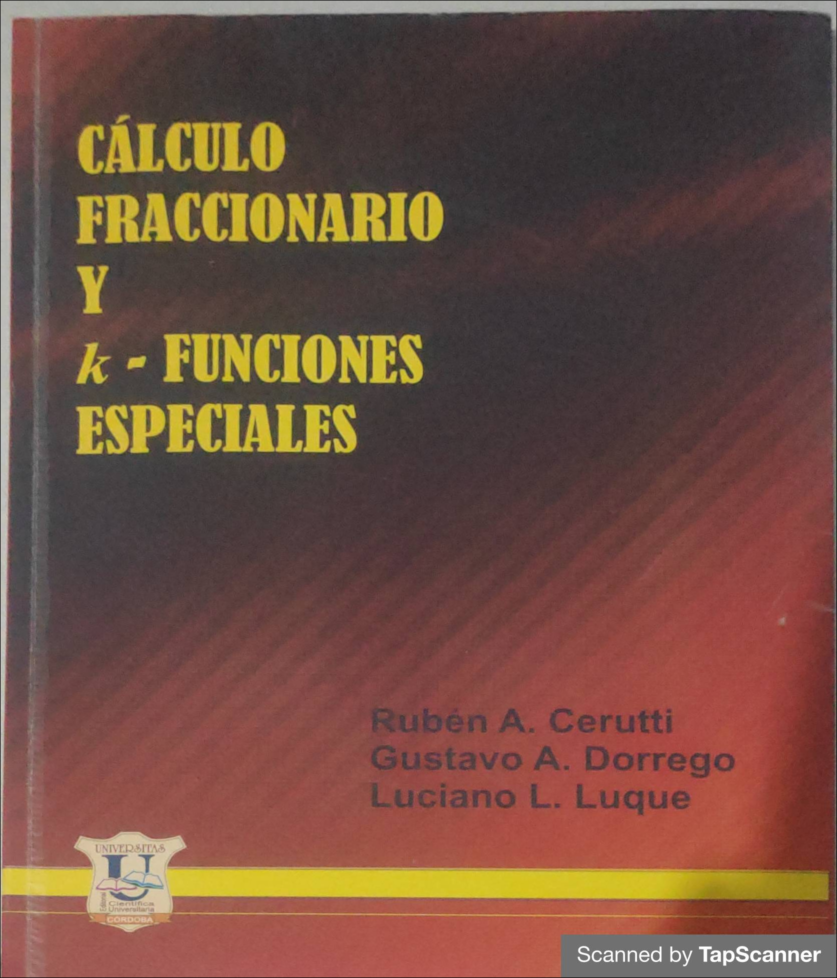

In [27]:
image = load(ruta)

In [1]:
using FractionalCalculus
using SymbolicUtils
using Latexify
using Plots


Para comenzar con la implementación de la derivada fraccionaria:

\begin{eqnarray*}
D^{0.5} \ x & = & \dfrac{2}{\sqrt{\pi}} \ x^{\frac{1}{2}}
\end{eqnarray*}

### Implementación en JULIA de $f(x) = x ; \ \ Df \ \in \ [0.1,0.5] $ con un paso $h=0.1$

In [16]:
fracdiff(x->x, 0.1, 0.5, 0.1,RLDiff_Approx()) # Para el intervalo [0.1,5]

0.5

In [4]:
fracdiff(x->x, 0.2, 1, 0.0001, RLDiff_Approx())  # Para el intervalo [0.2,1]

1.0736712740308372

$\underline{\textbf{Definición 10}}:$
Dada la función $f: \mathbb{R}^{+} \ \longrightarrow \ \mathbb{R}$ y $ \ m \ \in \ \mathbb{N}$ tal que $0 \ \leq \ m-1 \ \leq \ \alpha \ \leq m$. Entonces, si $t_{0}$ es el tiempo inicial, la derivada fraccionaria de Riemman-Liouville de orden $\alpha$;

\begin{eqnarray}
^{RL}\mathbf{D}^{\alpha}_{t_{0}} = 
   \begin{cases} 
      \frac{1}{\Gamma(m-\alpha)}\dfrac{d^{m}}{dt^{m}} \int_{t_{0}}^{t} \ (t- \tau)^{m-\alpha-1} d\tau, & \mbox{si } m-1 \ < \ \alpha \ < \ m ; \\
        &  \\ 
      \dfrac{d^{m}}{dt^{m}} f(t) & \mbox{si } \alpha = m 
   \end{cases}
\end{eqnarray}  


${ }^{ }$

Luego de la definición presentada en el libro antes mencionado, se puede, observar claramente las siguientes conclusiones

* Pariendo del cálculo que habitualmente se imparte en los primeros años como introducción, se tiene que:
\begin{eqnarray*}
\dfrac{d}{dx}(x) &= & 1
\end{eqnarray*}

* Aplicando la $\mathbf{Definición \ 10}$, las cosas para la misma expresión se comportan de una forma totalmente distinta, esto es:

\begin{eqnarray*}
\dfrac{d^{\frac{1}{2}}}{dx^{\frac{1}{2}}} &=& \dfrac{2 \sqrt{x} }{\sqrt{\pi}}
\end{eqnarray*}

Ahora no observando casos particulares, se puede ver que para la función $f(x) = x^{n}$, se tiene:

\begin{eqnarray*}
f'(x) &=& \dfrac{d}{dx} \ f(x) = n \cdot x^{n-1}
\end{eqnarray*}

Para la segunda derivada:

\begin{eqnarray*}
f''(x) &=& \dfrac{d^2}{dx^2} \ f(x) = n \cdot (n-1) \cdot x^{n-2}
\end{eqnarray*}

De este modo la $k-ésima$ derivada está dada por:

\begin{eqnarray*}
f^{(k)} & = & \dfrac{d^k}{dx^k} \ x^n =\dfrac{n!}{(n-k)!} \ x^{n-k} = \dfrac{\Gamma(k+1)}{\Gamma(k-n+1)} \ x^{n-k}
\end{eqnarray*}



Con esto en vista, volviendo al ejemplo de partida, las cosas quedan un poco más claras:



\begin{eqnarray*}
f^{(\frac{1}{2})} \ (x) & = & \dfrac{ \Gamma(2) }{ \Gamma(\frac{3}{2}) } \ x^{\frac{1}{2}} = \dfrac{2}{ \sqrt{\pi} } \ x^{\frac{1}{2}}
\end{eqnarray*}

# Implemntación en JULIA de la Derivada Fraccionaria para de f(x) = x, para [0.1,0.9], con un paso h=0.1

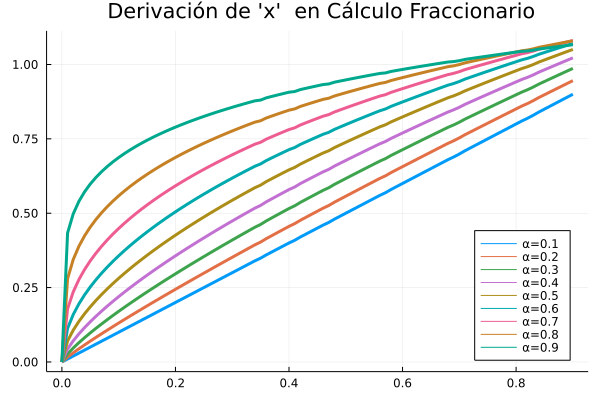

In [22]:


tspan=collect(0:0.01:0.9) # Exptemos del intervalos, valor del medio es el paso 

examplederivative = []  # Guarda la variable para ser dibujada

for i in range(0.0, 0.8, step=0.1)
    push!(examplederivative, fracdiff(x->x, i, tspan, 0.001, RLDiff_Approx())) #Define f(x)=x
end

plot(tspan, examplederivative, title=" Derivación de 'x'  en Cálculo Fraccionario", linewidth=3, label=["α=0.1" "α=0.2" "α=0.3" "α=0.4" "α=0.5" "α=0.6" "α=0.7" "α=0.8" "α=0.9"], legend=:bottomright)
#Plotea la función para que pueda ser graficada 